In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
pwd

'/Users/robfreed/Downloads'

In [3]:
df = pd.read_csv(r'/Users/robfreed/Downloads/nhanes.csv')
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
###Bivariate data arises when every "unit of analysis" (our observations) is assessed with respect to two traits
###Scatterplot good for quantitative bivariate data
###Make scatter plot of arm length against leg length
###We see a positive relationship --> Long arms, Long legs etc

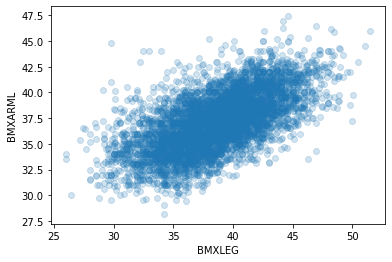

In [8]:
sns.regplot(x= "BMXLEG", y = "BMXARML", data = df, fit_reg = False, scatter_kws={"alpha": 0.2})
###Alpha command helps us with overplotting, making points semi transparent

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


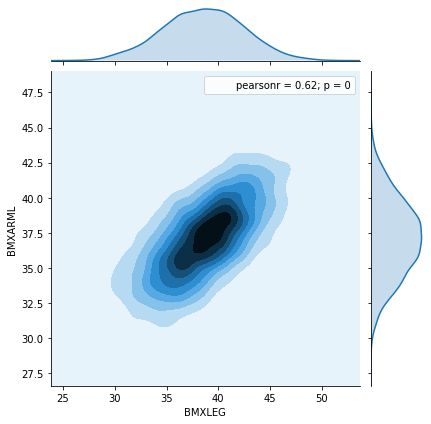

In [9]:
###Another way to avoid overplotting is "density" points
###Darker colors indicate where greater number of points fall
###Plot also shows pearson correlation 
sns.jointplot(x = "BMXLEG", y = "BMXARML", kind = "kde", data = df).annotate(stats.pearsonr)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


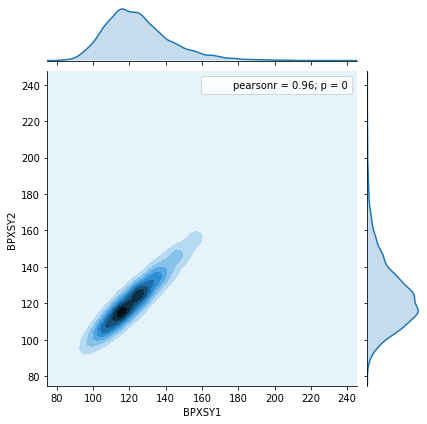

In [10]:
###Next looking at measures of systolic blood pressure, BPXSY1 and BPXSY2
sns.jointplot(x = "BPXSY1", y = "BPXSY2", kind = "kde", data = df).annotate(stats.pearsonr)

In [11]:
####Heterogeneity and Stratification
###Variation by gender, age, ethnicity and other factors is often referred to as Heterogeneity
###when Heterogeneity present, want to stratify by import factors


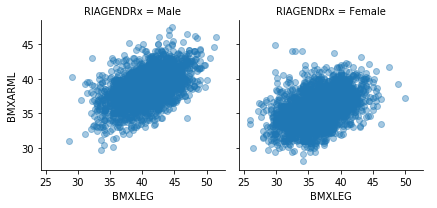

In [12]:
###Continue analysis of arm length BMXARML and leg length BMXLEG
###Stratifying first by gender 
###Then stratifying by gender AND ethnicity 
df["RIAGENDRx"] = df.RIAGENDR.replace({1: "Male", 2: "Female"})
sns.FacetGrid(df, col = "RIAGENDRx").map(plt.scatter, "BMXLEG", "BMXARML", alpha = 0.4).add_legend()
###Plot shows men tend to have longer arms and legs than woman (Left Graph points shifted slightly upward)
###Correlation weaker in woman than in men

In [13]:
###Calculate correlation seperately by gender
###corr returns a correlation matrix diagonals have a 1 because each variable is perfectly correlated with itself
print(df.loc[df.RIAGENDRx=="Female", ["BMXARML", "BMXLEG"]].dropna().corr())
###Correlation in women equals approx .43

          BMXARML    BMXLEG
BMXARML  1.000000  0.434703
BMXLEG   0.434703  1.000000


In [15]:
print(df.loc[df.RIAGENDRx == "Male", ["BMXARML", "BMXLEG"]].dropna().corr())
###Correlation in men equal approx .5

          BMXARML    BMXLEG
BMXARML  1.000000  0.505426
BMXLEG   0.505426  1.000000


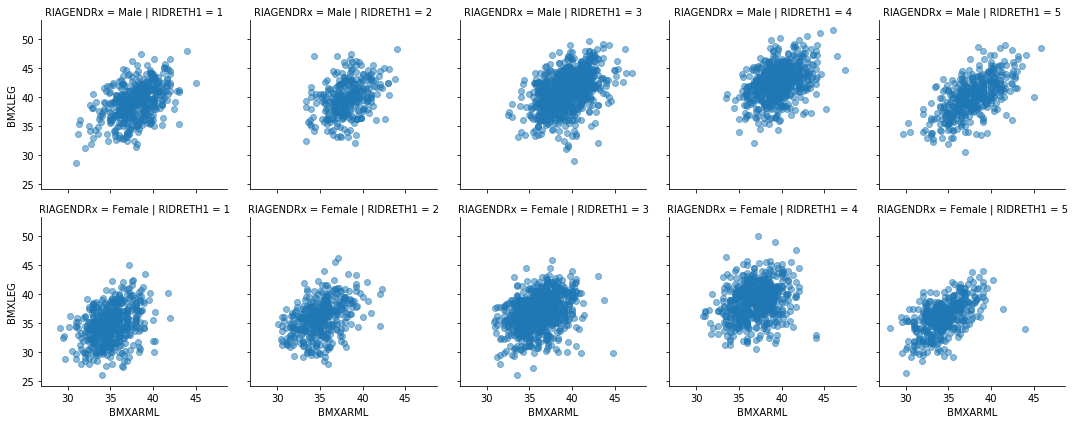

In [16]:
###Next we stratify by both gender and ethnicity
### 2 genders an 5 ethnicities reported calls for 10 strata
_  = sns.FacetGrid(df, col = "RIDRETH1", row = "RIAGENDRx").map(plt.scatter, "BMXARML", "BMXLEG", alpha = 0.5).add_legend()

In [28]:
###Categorical Bivariate Data
###Start with contingency table, that counts number of people who have the combination of the two factors at hand
###Consider Marital Status and Education level
df["DMDEDUC2x"] = df.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some College/AA", 5: "College", 7: "Refused", 9: "Don't Know"})
df["DMDMARTLx"] = df.DMDMARTL.replace({1 : "Married", 2: "Widowed", 3: "Divorced", 4: "Seperated", 5: "Never Married", 6: "Living w/ Partner", 77: "Refused"})
db = df.loc[(df.DMDEDUC2x != "Don't Know") & (df.DMDMARTLx != "Refused"), :]

In [29]:
###Now that we renamed the values, we can create contingency table that counts the number of people in each combo of education and marital status
x = pd.crosstab(db.DMDEDUC2x, df.DMDMARTLx)

In [30]:
x

DMDMARTLx,Divorced,Living w/ Partner,Married,Never Married,Seperated,Widowed
DMDEDUC2x,,,,,,
9-11,62,80,305,117,39,40
<9,52,66,341,65,43,88
College,120,85,827,253,22,59
HS/GED,127,133,550,237,40,99
Some College/AA,217,163,757,332,42,108


In [31]:
###Results easier to interpret if we normalize the data
###Make rows and columns sum up to 1
x.apply(lambda z: z/z.sum(), axis = 1)
###Married people most common
###Married college grads most most common


DMDMARTLx,Divorced,Living w/ Partner,Married,Never Married,Seperated,Widowed
DMDEDUC2x,,,,,,
9-11,0.096423,0.124417,0.474339,0.181960,0.060653,0.062208
<9,0.079389,0.100763,0.520611,0.099237,0.065649,0.134351
College,0.087848,0.062225,0.605417,0.185212,0.016105,0.043192
HS/GED,0.107083,0.112142,0.463744,0.199831,0.033727,0.083474
Some College/AA,0.134033,0.100679,0.467573,0.205065,0.025942,0.066708


In [32]:
###Normalize within columns instead of rows
x.apply(lambda z : z/z.sum(), axis = 0)

DMDMARTLx,Divorced,Living w/ Partner,Married,Never Married,Seperated,Widowed
DMDEDUC2x,,,,,,
9-11,0.107266,0.151803,0.109712,0.116534,0.209677,0.101523
<9,0.089965,0.125237,0.122662,0.064741,0.231183,0.223350
College,0.207612,0.161290,0.297482,0.251992,0.118280,0.149746
HS/GED,0.219723,0.252372,0.197842,0.236056,0.215054,0.251269
Some College/AA,0.375433,0.309298,0.272302,0.330677,0.225806,0.274112


In [33]:
###Now lets add gender in 
###1. Group the data by every combination of gender, education, and marital status
###2. Count number in each cell using "size" method
###3. Pivot marital status into columns using .unstack
###4. Fill any empty cells with 0
###5. Normalize data by row
db.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis = 1)

DMDMARTLx                  Divorced  Living w/ Partner   Married  \
RIAGENDRx DMDEDUC2x                                                
Female    9-11             0.113402           0.123711  0.412371   
          <9               0.091691           0.091691  0.424069   
          College          0.110181           0.055788  0.577406   
          HS/GED           0.121784           0.109777  0.413379   
          Some College/AA  0.148678           0.099119  0.418502   
Male      9-11             0.082386           0.125000  0.525568   
          <9               0.065359           0.111111  0.630719   
          College          0.063174           0.069337  0.636364   
          HS/GED           0.092869           0.114428  0.512438   
          Some College/AA  0.115331           0.102672  0.530239   

DMDMARTLx                  Never Married  Seperated   Widowed  
RIAGENDRx DMDEDUC2x                                            
Female    9-11                  0.171821   0.075601  0.103093  
          <9                    0.108883   0.088825  0.194842  
          College               0.182706   0.016736  0.057183  
          HS/GED                0.188679   0.041166  0.125214  
          Some College/AA       0.210352   0.031938  0.091410  
Male      9-11                  0.190341   0.048295  0.028409  
          <9                    0.088235   0.039216  0.065359  
          College               0.187982   0.015408  0.027735  
          HS/GED                0.210614   0.026534  0.043118  
          Some College/AA       0.198312   0.018284  0.035162

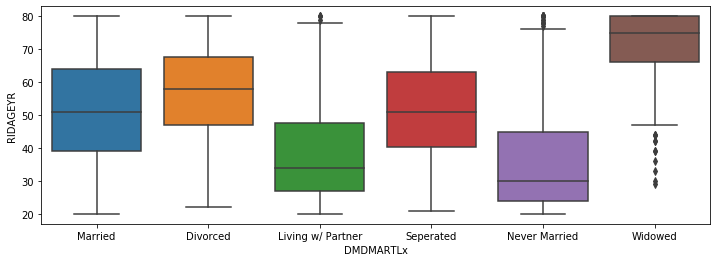

In [34]:
###Mixed Categorical and Quantitative Data
###side by side boxplots
plt.figure(figsize=(12,4))
a = sns.boxplot(db.DMDMARTLx, db.RIDAGEYR)

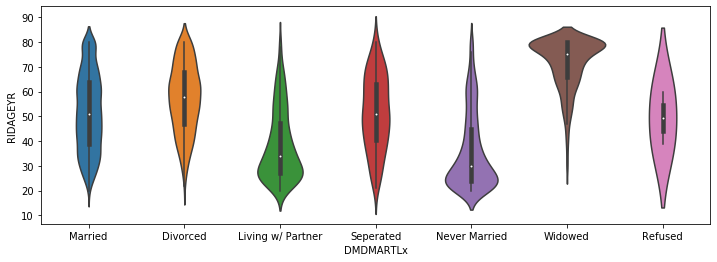

In [36]:
###violinplot can help show us the shapes of the distributions compared to normal boxplot
plt.figure(figsize=(12,4))
a = sns.violinplot(df.DMDMARTLx, df.RIDAGEYR)

In [37]:
df = pd.read_csv(r'/Users/robfreed/Downloads/cartwheel.csv')
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [38]:
df.head()

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56,F,1,Y,1,62.0,61.0,79,Y,1,7
1,2,26,F,1,Y,1,62.0,60.0,70,Y,1,8
2,3,33,F,1,Y,1,66.0,64.0,85,Y,1,7
3,4,39,F,1,N,0,64.0,63.0,87,Y,1,10
4,5,27,M,2,N,0,73.0,75.0,72,N,0,4


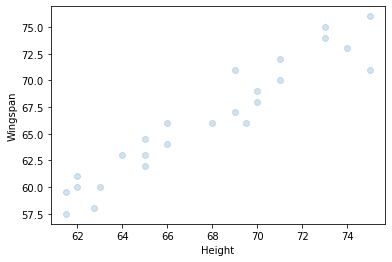

In [39]:
sns.regplot(x = "Height", y = "Wingspan", data = df, fit_reg = False, scatter_kws={"alpha":0.2})

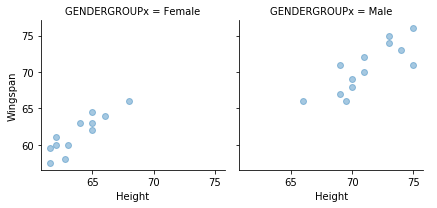

In [42]:
df["GENDERGROUPx"] = df.GenderGroup.replace({1: "Female", 2: "Male"})
sns.FacetGrid(df, col = "GENDERGROUPx").map(plt.scatter, "Height", "Wingspan", alpha = 0.4).add_legend()

In [43]:
df.describe()

,ID,Age,GenderGroup,GlassesGroup,Height,Wingspan,CWDistance,CompleteGroup,Score
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000
mean,13.000000,28.240000,1.520000,0.560000,67.650000,66.260000,82.480000,0.76000,6.400000
std,7.359801,6.989754,0.509902,0.506623,4.431187,5.492647,15.058552,0.43589,2.533114
min,1.000000,22.000000,1.000000,0.000000,61.500000,57.500000,63.000000,0.00000,2.000000
25%,7.000000,24.000000,1.000000,0.000000,64.000000,62.000000,70.000000,1.00000,4.000000
50%,13.000000,26.000000,2.000000,1.000000,68.000000,66.000000,81.000000,1.00000,6.000000
75%,19.000000,29.000000,2.000000,1.000000,71.000000,71.000000,92.000000,1.00000,8.000000
max,25.000000,56.000000,2.000000,1.000000,75.000000,76.000000,115.000000,1.00000,10.000000


In [45]:
df.head()

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score,GENDERGROUPx
0,1,56,F,1,Y,1,62.0,61.0,79,Y,1,7,Female
1,2,26,F,1,Y,1,62.0,60.0,70,Y,1,8,Female
2,3,33,F,1,Y,1,66.0,64.0,85,Y,1,7,Female
3,4,39,F,1,N,0,64.0,63.0,87,Y,1,10,Female
4,5,27,M,2,N,0,73.0,75.0,72,N,0,4,Male


In [51]:
df["GLASSESGROUPx"] = df.GlassesGroup.replace({1 : "Yes", 2: "No"})


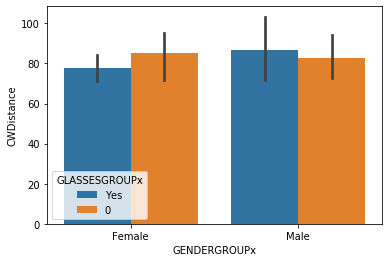

In [53]:
sns.barplot(x = "GENDERGROUPx", y = "CWDistance", hue = "GLASSESGROUPx", data = df)